In [1]:
from __future__ import print_function

import sys
import socket
import os

if socket.gethostname() == "toologic-ubuntu2":
    repo_path = os.path.expanduser('~/repository/seg_uncertainty')
else:
    repo_path = os.path.expanduser('~/repo/seg_uncertainty')
sys.path.extend([repo_path])

import matplotlib
import matplotlib.pyplot as plt

from matplotlib import cm

from datetime import datetime
from pytz import timezone
import copy

import numpy as np
import cv2
import SimpleITK as sitk

from datasets.data_config import get_config
from eval_probs.calibration import compute_calibration

%matplotlib inline
%load_ext autoreload
%autoreload 2
print("Ready")

Ready


# Generate softmax calibration statistics for one cardiac phase

In [61]:
# dcnn_mc_daugbrierv2
# drn_mc_brierv2_cyclic
# drn_mcc_brierv2_cyclic
# dcnn_mc_augdfltdicev3
load_dir = os.path.expanduser("~/expers/acdc/dcnn_mc_brier")
with_bg = True
mc_dropout = True
do_save = False
patient_id = None
cardiac_phase = "all"

calibration_results = \
        compute_calibration(load_dir, cardiac_phase ,patient_id=patient_id, 
                            mc_dropout=mc_dropout, 
                            do_save=do_save, with_bg=with_bg)

print("ECE per class ", calibration_results['mean_ece_per_class'])
print("Total ECE ", np.sum(calibration_results['mean_ece_per_class']))


INFO - WITH background class
INFO - Loading probabilities and predictions from /home/jorg/expers/acdc/dcnn_mc_brier


Processing softmax predictions:  28%|██▊       | 28/100 [00:06<00:15,  4.55it/s]

WARNING - skipping patient patient029


Processing softmax predictions:  28%|██▊       | 28/100 [00:06<00:16,  4.47it/s]

WARNING - skipping patient patient029


Processing softmax predictions: 100%|██████████| 100/100 [00:20<00:00,  4.94it/s]

[0.88188317 0.47374808 0.45877815 0.2143267 ]
[198. 198. 198. 198.]
ECE per class  [0.00445396 0.00239267 0.00231706 0.00108246]
Total ECE  0.010246141910874668


In [28]:
print("ECE ", calibration_results['mean_ece_per_class'])

ECE  [0.         0.00231706 0.00108246]


In [13]:
probs_per_bin = calibration_results['probs_per_bin']
prob_bin_edges = calibration_results['prob_bin_edges']
acc_per_bin = calibration_results['acc_per_bin']

[3.16202532e-04 1.44279087e-01 2.46794638e-01 3.47380569e-01
 4.48013298e-01 5.49011982e-01 6.49987099e-01 7.51791425e-01
 8.54317429e-01 9.87889365e-01]
[1.67867074e-04 8.69984284e-02 1.51492695e-01 2.22425421e-01
 2.84868931e-01 3.58224074e-01 4.12637973e-01 5.31735138e-01
 6.57313787e-01 9.35021246e-01]


## Generate plots for one model for ED/ES and with and without mc dropout

In [63]:
from plotting.calibration_plots import plot_reliability_diagram

load_dir = os.path.expanduser("~/expers/acdc/dcnn_mc_dice")
do_save = True
with_bg = True
cardiac_phase = "all"

for mc_dropout in [False, True]:
    print("INFO - {} generating calibration stats for {}".format(load_dir, mc_dropout))
    calibration_results = \
            compute_calibration(load_dir, cardiac_phase ,patient_id=None, mc_dropout=mc_dropout, 
                                      do_save=False, with_bg=with_bg)
    plot_reliability_diagram(calibration_results, do_save=do_save, per_class=False, width=10, height=10
                                , do_show=False)
    print("ECE per class ", calibration_results['mean_ece_per_class'])
    print("Total ECE ", np.sum(calibration_results['mean_ece_per_class']))

INFO - /home/jorg/expers/acdc/dcnn_mc_dice generating calibration stats for False
INFO - WITH background class
INFO - Loading probabilities and predictions from /home/jorg/expers/acdc/dcnn_mc_dice


/home/jorg/anaconda3/envs/pyt_1_2_0/lib/python3.6/site-packages/scipy/ndimage/interpolation.py:611: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)
Processing softmax predictions:  30%|███       | 30/100 [00:05<00:11,  6.07it/s]

WARNING - skipping patient patient029


Processing softmax predictions:  28%|██▊       | 28/100 [00:05<00:16,  4.49it/s]

WARNING - skipping patient patient029


Processing softmax predictions: 100%|██████████| 100/100 [00:18<00:00,  5.45it/s]


[0.79444386 0.42219447 0.41101642 0.17715955]
[198. 198. 198. 198.]
INFO - Successfully saved fig /home/jorg/expers/acdc/dcnn_mc_dice/prob_calibration_DN-SD_all.jpeg
ECE per class  [0.00401234 0.0021323  0.00207584 0.00089475]
Total ECE  0.009115223729946253
INFO - /home/jorg/expers/acdc/dcnn_mc_dice generating calibration stats for True
INFO - WITH background class
INFO - Loading probabilities and predictions from /home/jorg/expers/acdc/dcnn_mc_dice


/home/jorg/anaconda3/envs/pyt_1_2_0/lib/python3.6/site-packages/scipy/ndimage/interpolation.py:611: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)
Processing softmax predictions:  28%|██▊       | 28/100 [00:05<00:14,  4.94it/s]

WARNING - skipping patient patient029


Processing softmax predictions:  28%|██▊       | 28/100 [00:06<00:16,  4.36it/s]

WARNING - skipping patient patient029


Processing softmax predictions: 100%|██████████| 100/100 [00:19<00:00,  5.06it/s]


[0.60021359 0.32354324 0.2506314  0.14440882]
[198. 198. 198. 198.]
INFO - Successfully saved fig /home/jorg/expers/acdc/dcnn_mc_dice/prob_calibration_DN-SD_all_mc.jpeg
ECE per class  [0.00303138 0.00163406 0.00126582 0.00072934]
Total ECE  0.00666059120855969


## Plot a single reliability diagram

INFO - Successfully saved fig /home/jorg/expers/acdc/unet_mc_dice/prob_calibration_U-net-SD_all_mc.jpeg


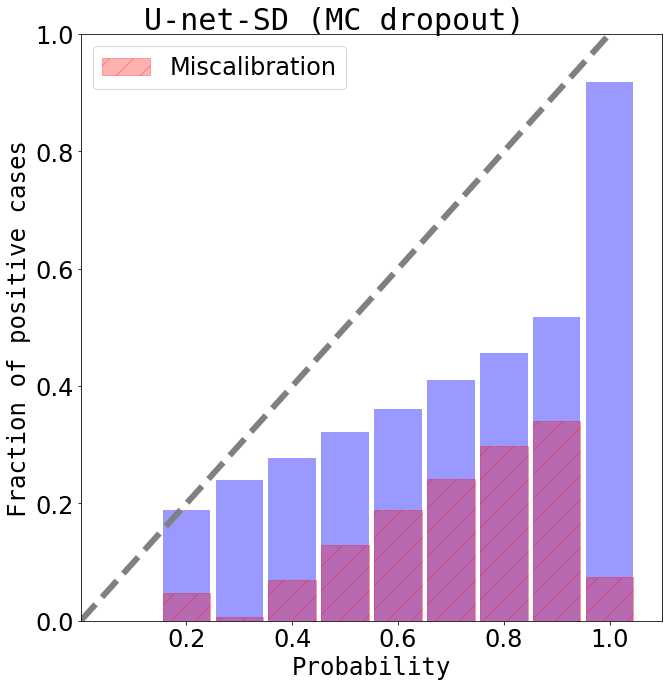

In [37]:
from plotting.calibration_plots import plot_reliability_diagram

plot_reliability_diagram(calibration_results, do_save=True, per_class=False, width=10, height=10)